In [12]:
import os
import re
import numpy as np
from PIL import Image
from scipy.ndimage import distance_transform_edt
from skimage.filters import threshold_otsu  # Add this import statement
import cripser as cr
import tcripser as tcr
import persim
from persim.persistent_entropy import *
import pandas as pd

data=[]

numbers = re.compile(r'(\d+)')
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

# Function to compute distance transform
def dt(img, radius=15, signed=False):
    bw_img = (img >= threshold_otsu(img))
    dt_img = distance_transform_edt(bw_img)
    if signed:
        dt_img -= distance_transform_edt(~bw_img)
    return dt_img

# Function to compute persistence diagram and calculate persistence entropy
def compute_persistence_entropy(imgfile):
    # Load image data
    img2d = np.array(Image.open(imgfile).convert('L'))

    # Apply distance transform
    img2d_dt = dt(img2d)

    # Compute persistence diagrams
    pd = cr.computePH(img2d)
    pds = [pd[pd[:, 0] == i] for i in range(3)]

    # Compute persistence entropy
    entropies = []
    for p in pds:
        entropy = persistent_entropy(p[:, 1:3])
        entropies.append(entropy)

    return entropies

if __name__ == "__main__":
    # Provide the path to the input DICOM folder
    class_labels=["Bengin cases","Normal cases","Malignant cases"]
    for class_label in class_labels:
        input_folder = "C:\\Users\\Aneesh PB\\Downloads\\Topology Project Image To Entropy\\Images"
        input_folder = os.path.join(input_folder, class_label)
        #class_labels=["Benign","Normal","Malignant"]
        # Iterate through each image in the folder
        for imgfile in sorted(os.listdir(input_folder), key=numericalSort):
            imgfile = os.path.join(input_folder, imgfile)
            if os.path.isfile(imgfile):
                entropies = compute_persistence_entropy(imgfile)
                entropy_0=entropies[0][0]*10**301
                entropy_1=entropies[1][0]
                print(f"Entropies for {imgfile}:",entropy_0,entropy_1)
                data.append({'Entropy 0': entropy_0, 'Entropy 1': entropy_1, 'Class': class_label})
df = pd.DataFrame(data)
df.to_excel("C:\\Users\\Aneesh PB\\Downloads\\Topology Project Image To Entropy\\entropy.xlsx", index=False)
# Append data to existing Excel file or create a new one if it doesn't exist


Entropies for C:\Users\Aneesh PB\Downloads\Topology Project Image To Entropy\Images\Bengin cases\Bengin case (1).jpg: 3.591387014058807 8.971071139848993
Entropies for C:\Users\Aneesh PB\Downloads\Topology Project Image To Entropy\Images\Bengin cases\Bengin case (2).jpg: 3.433465663683417 8.937837054379237
Entropies for C:\Users\Aneesh PB\Downloads\Topology Project Image To Entropy\Images\Bengin cases\Bengin case (3).jpg: 3.1857944431219725 8.886191656536425
Entropies for C:\Users\Aneesh PB\Downloads\Topology Project Image To Entropy\Images\Bengin cases\Bengin case (4).jpg: 2.772463778353726 8.979550208013752
Entropies for C:\Users\Aneesh PB\Downloads\Topology Project Image To Entropy\Images\Bengin cases\Bengin case (5).jpg: 2.7800775320220326 8.962683116289414
Entropies for C:\Users\Aneesh PB\Downloads\Topology Project Image To Entropy\Images\Bengin cases\Bengin case (6).jpg: 3.2809183689600667 8.948914075908682
Entropies for C:\Users\Aneesh PB\Downloads\Topology Project Image To Entr

: 

In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Data Preprocessing
df =pd.read_excel("C:\\Users\\Aneesh PB\\Downloads\\Topology Project Image To Entropy\\entropy.xlsx")
classes = ['Normal cases', 'Bengin cases', 'Malignant cases']
# X = []
# y = []

# for class_idx, class_name in enumerate(classes):
#     class_dir = os.path.join(data_dir, class_name)
#     for file_name in os.listdir(class_dir):
#         if file_name.endswith('.xlsx'):
#             file_path = os.path.join(class_dir, file_name)
#             df = pd.read_excel(file_path)
#             intensity_values = df['Intensity'].values
#             entropy_0_values = df['Entropy 0'].values
#             entropy_1_values = df['Entropy 1'].values
#             features = np.column_stack((intensity_values, entropy_0_values, entropy_1_values))
#             X.append(features)
#             for i in range(len(features)):  
#                 y.append(class_idx)
# X = np.concatenate(X)
# y = np.array(y)

X=df.iloc[:,:2]
y=df.iloc[:,2]
X
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)



In [2]:
X

,Entropy 0,Entropy 1
0,3.591387,8.971071
1,3.433466,8.937837
2,3.185794,8.886192
3,2.772464,8.979550
4,2.780078,8.962683
...,...,...
1092,0.643065,7.785089
1093,0.641343,7.722035
1094,0.647753,7.671827
1095,0.628998,7.672080


In [3]:
# print(float(entropy_0)*10**302)

In [4]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Step 3: Evaluation
y_pred = svm_model.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=classes))


Confusion Matrix:
[[  0   1  15]
 [  0 115   4]
 [  0   2  83]]

Classification Report:
                 precision    recall  f1-score   support

   Normal cases       0.00      0.00      0.00        16
   Bengin cases       0.97      0.97      0.97       119
Malignant cases       0.81      0.98      0.89        85

       accuracy                           0.90       220
      macro avg       0.60      0.65      0.62       220
   weighted avg       0.84      0.90      0.87       220



c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Create and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=2)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Results:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf)) 

import pickle

# Save the model to disk
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)


Random Forest Results:
[[ 10   0   6]
 [  0 119   0]
 [  5   0  80]]
                 precision    recall  f1-score   support

   Bengin cases       0.67      0.62      0.65        16
Malignant cases       1.00      1.00      1.00       119
   Normal cases       0.93      0.94      0.94        85

       accuracy                           0.95       220
      macro avg       0.87      0.86      0.86       220
   weighted avg       0.95      0.95      0.95       220



In [6]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Assuming y_test contains the true labels and y_pred contains the predicted labels

# Calculate precision, recall, F1-score, and accuracy
precision = precision_score(y_test, y_pred_rf, average='macro')
recall = recall_score(y_test, y_pred_rf, average='macro')
f1 = f1_score(y_test, y_pred_rf, average='macro')
accuracy = accuracy_score(y_test, y_pred_rf)

print("Overall Precision:", precision)
print("Overall Recall:", recall)
print("Overall F1-score:", f1)
print("Overall Accuracy:", accuracy)


Overall Precision: 0.8656330749354004
Overall Recall: 0.8553921568627452
Overall F1-score: 0.8602779349808212
Overall Accuracy: 0.95


In [18]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
# Create and train the model
le=LabelEncoder()
y_train_encoded=le.fit_transform(y_train)
y_test_encoded=le.fit_transform(y_test)
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(classes), random_state=42)
xgb_model.fit(X_train, y_train_encoded)


# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("XGBoost Results:")

print(confusion_matrix(y_test_encoded, y_pred_xgb))
print(classification_report(y_test_encoded, y_pred_xgb))
xgb_model.save_model('xgboost_model.model')


XGBoost Results:
[[  9   0   7]
 [  1 118   0]
 [  3   0  82]]
              precision    recall  f1-score   support

           0       0.69      0.56      0.62        16
           1       1.00      0.99      1.00       119
           2       0.92      0.96      0.94        85

    accuracy                           0.95       220
   macro avg       0.87      0.84      0.85       220
weighted avg       0.95      0.95      0.95       220



c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:160: UserWarning: [00:08:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Assuming y_test contains the true labels and y_pred contains the predicted labels

# Calculate precision, recall, F1-score, and accuracy
precision = precision_score(y_test_encoded, y_pred_xgb, average='macro')
recall = recall_score(y_test_encoded, y_pred_xgb, average='macro')
f1 = f1_score(y_test_encoded, y_pred_xgb, average='macro')
accuracy = accuracy_score(y_test_encoded, y_pred_xgb)

print("Overall Precision:", precision)
print("Overall Recall:", recall)
print("Overall F1-score:", f1)
print("Overall Accuracy:", accuracy)


Overall Precision: 0.871218668971478
Overall Recall: 0.8396008403361345
Overall F1-score: 0.8529996605072991
Overall Accuracy: 0.95


In [20]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Step 3: Evaluation
y_pred = svm_model.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=classes))

Confusion Matrix:
[[  0   1  15]
 [  0 115   4]
 [  0   2  83]]

Classification Report:
                 precision    recall  f1-score   support

   Normal cases       0.00      0.00      0.00        16
   Bengin cases       0.97      0.97      0.97       119
Malignant cases       0.81      0.98      0.89        85

       accuracy                           0.90       220
      macro avg       0.60      0.65      0.62       220
   weighted avg       0.84      0.90      0.87       220



c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Assuming y_test contains the true labels and y_pred contains the predicted labels

# Calculate precision, recall, F1-score, and accuracy
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)

print("Overall Precision:", precision)
print("Overall Recall:", recall)
print("Overall F1-score:", f1)
print("Overall Accuracy:", accuracy)


Overall Precision: 0.5961005871275064
Overall Recall: 0.6476190476190476
Overall F1-score: 0.6193882232601519
Overall Accuracy: 0.9


c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pickle

# Create and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors (k)
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
print("KNN Results:")
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn)) 

# Save the model to disk
with open('knn_model.pkl', 'wb') as f:
    pickle.dump(knn_model, f)


KNN Results:
[[  8   0   8]
 [  0 119   0]
 [  6   1  78]]
                 precision    recall  f1-score   support

   Bengin cases       0.57      0.50      0.53        16
Malignant cases       0.99      1.00      1.00       119
   Normal cases       0.91      0.92      0.91        85

       accuracy                           0.93       220
      macro avg       0.82      0.81      0.81       220
   weighted avg       0.93      0.93      0.93       220



In [23]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Assuming y_test contains the true labels and y_pred contains the predicted labels

# Calculate precision, recall, F1-score, and accuracy
precision = precision_score(y_test, y_pred_knn, average='macro')
recall = recall_score(y_test, y_pred_knn, average='macro')
f1 = f1_score(y_test, y_pred_knn, average='macro')
accuracy = accuracy_score(y_test, y_pred_knn)

print("Overall Precision:", precision)
print("Overall Recall:", recall)
print("Overall F1-score:", f1)
print("Overall Accuracy:", accuracy)


Overall Precision: 0.8233573274270949
Overall Recall: 0.8058823529411764
Overall F1-score: 0.8138099782231031
Overall Accuracy: 0.9318181818181818


In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
import pickle

# Create and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model
print("Naive Bayes Results:")
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb)) 

# Save the model to disk
with open('naive_bayes_model.pkl', 'wb') as f:
    pickle.dump(nb_model, f)


Naive Bayes Results:
[[  0   3  13]
 [  0 115   4]
 [  0  20  65]]
                 precision    recall  f1-score   support

   Bengin cases       0.00      0.00      0.00        16
Malignant cases       0.83      0.97      0.89       119
   Normal cases       0.79      0.76      0.78        85

       accuracy                           0.82       220
      macro avg       0.54      0.58      0.56       220
   weighted avg       0.76      0.82      0.78       220



c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Assuming y_test contains the true labels and y_pred contains the predicted labels

# Calculate precision, recall, F1-score, and accuracy
precision = precision_score(y_test, y_pred_nb, average='macro')
recall = recall_score(y_test, y_pred_nb, average='macro')
f1 = f1_score(y_test, y_pred_nb, average='macro')
accuracy = accuracy_score(y_test, y_pred_nb)

print("Overall Precision:", precision)
print("Overall Recall:", recall)
print("Overall F1-score:", f1)
print("Overall Accuracy:", accuracy)


Overall Precision: 0.5420054200542005
Overall Recall: 0.57703081232493
Overall F1-score: 0.5577949160045668
Overall Accuracy: 0.8181818181818182


c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
list(y_train)


['Normal cases',
 'Normal cases',
 'Malignant cases',
 'Malignant cases',
 'Malignant cases',
 'Malignant cases',
 'Normal cases',
 'Normal cases',
 'Normal cases',
 'Normal cases',
 'Bengin cases',
 'Bengin cases',
 'Bengin cases',
 'Malignant cases',
 'Normal cases',
 'Malignant cases',
 'Malignant cases',
 'Normal cases',
 'Normal cases',
 'Malignant cases',
 'Malignant cases',
 'Normal cases',
 'Normal cases',
 'Malignant cases',
 'Malignant cases',
 'Normal cases',
 'Malignant cases',
 'Normal cases',
 'Malignant cases',
 'Normal cases',
 'Malignant cases',
 'Malignant cases',
 'Malignant cases',
 'Malignant cases',
 'Bengin cases',
 'Malignant cases',
 'Malignant cases',
 'Malignant cases',
 'Normal cases',
 'Malignant cases',
 'Normal cases',
 'Normal cases',
 'Malignant cases',
 'Malignant cases',
 'Malignant cases',
 'Normal cases',
 'Malignant cases',
 'Malignant cases',
 'Normal cases',
 'Normal cases',
 'Malignant cases',
 'Normal cases',
 'Normal cases',
 'Malignant cases'

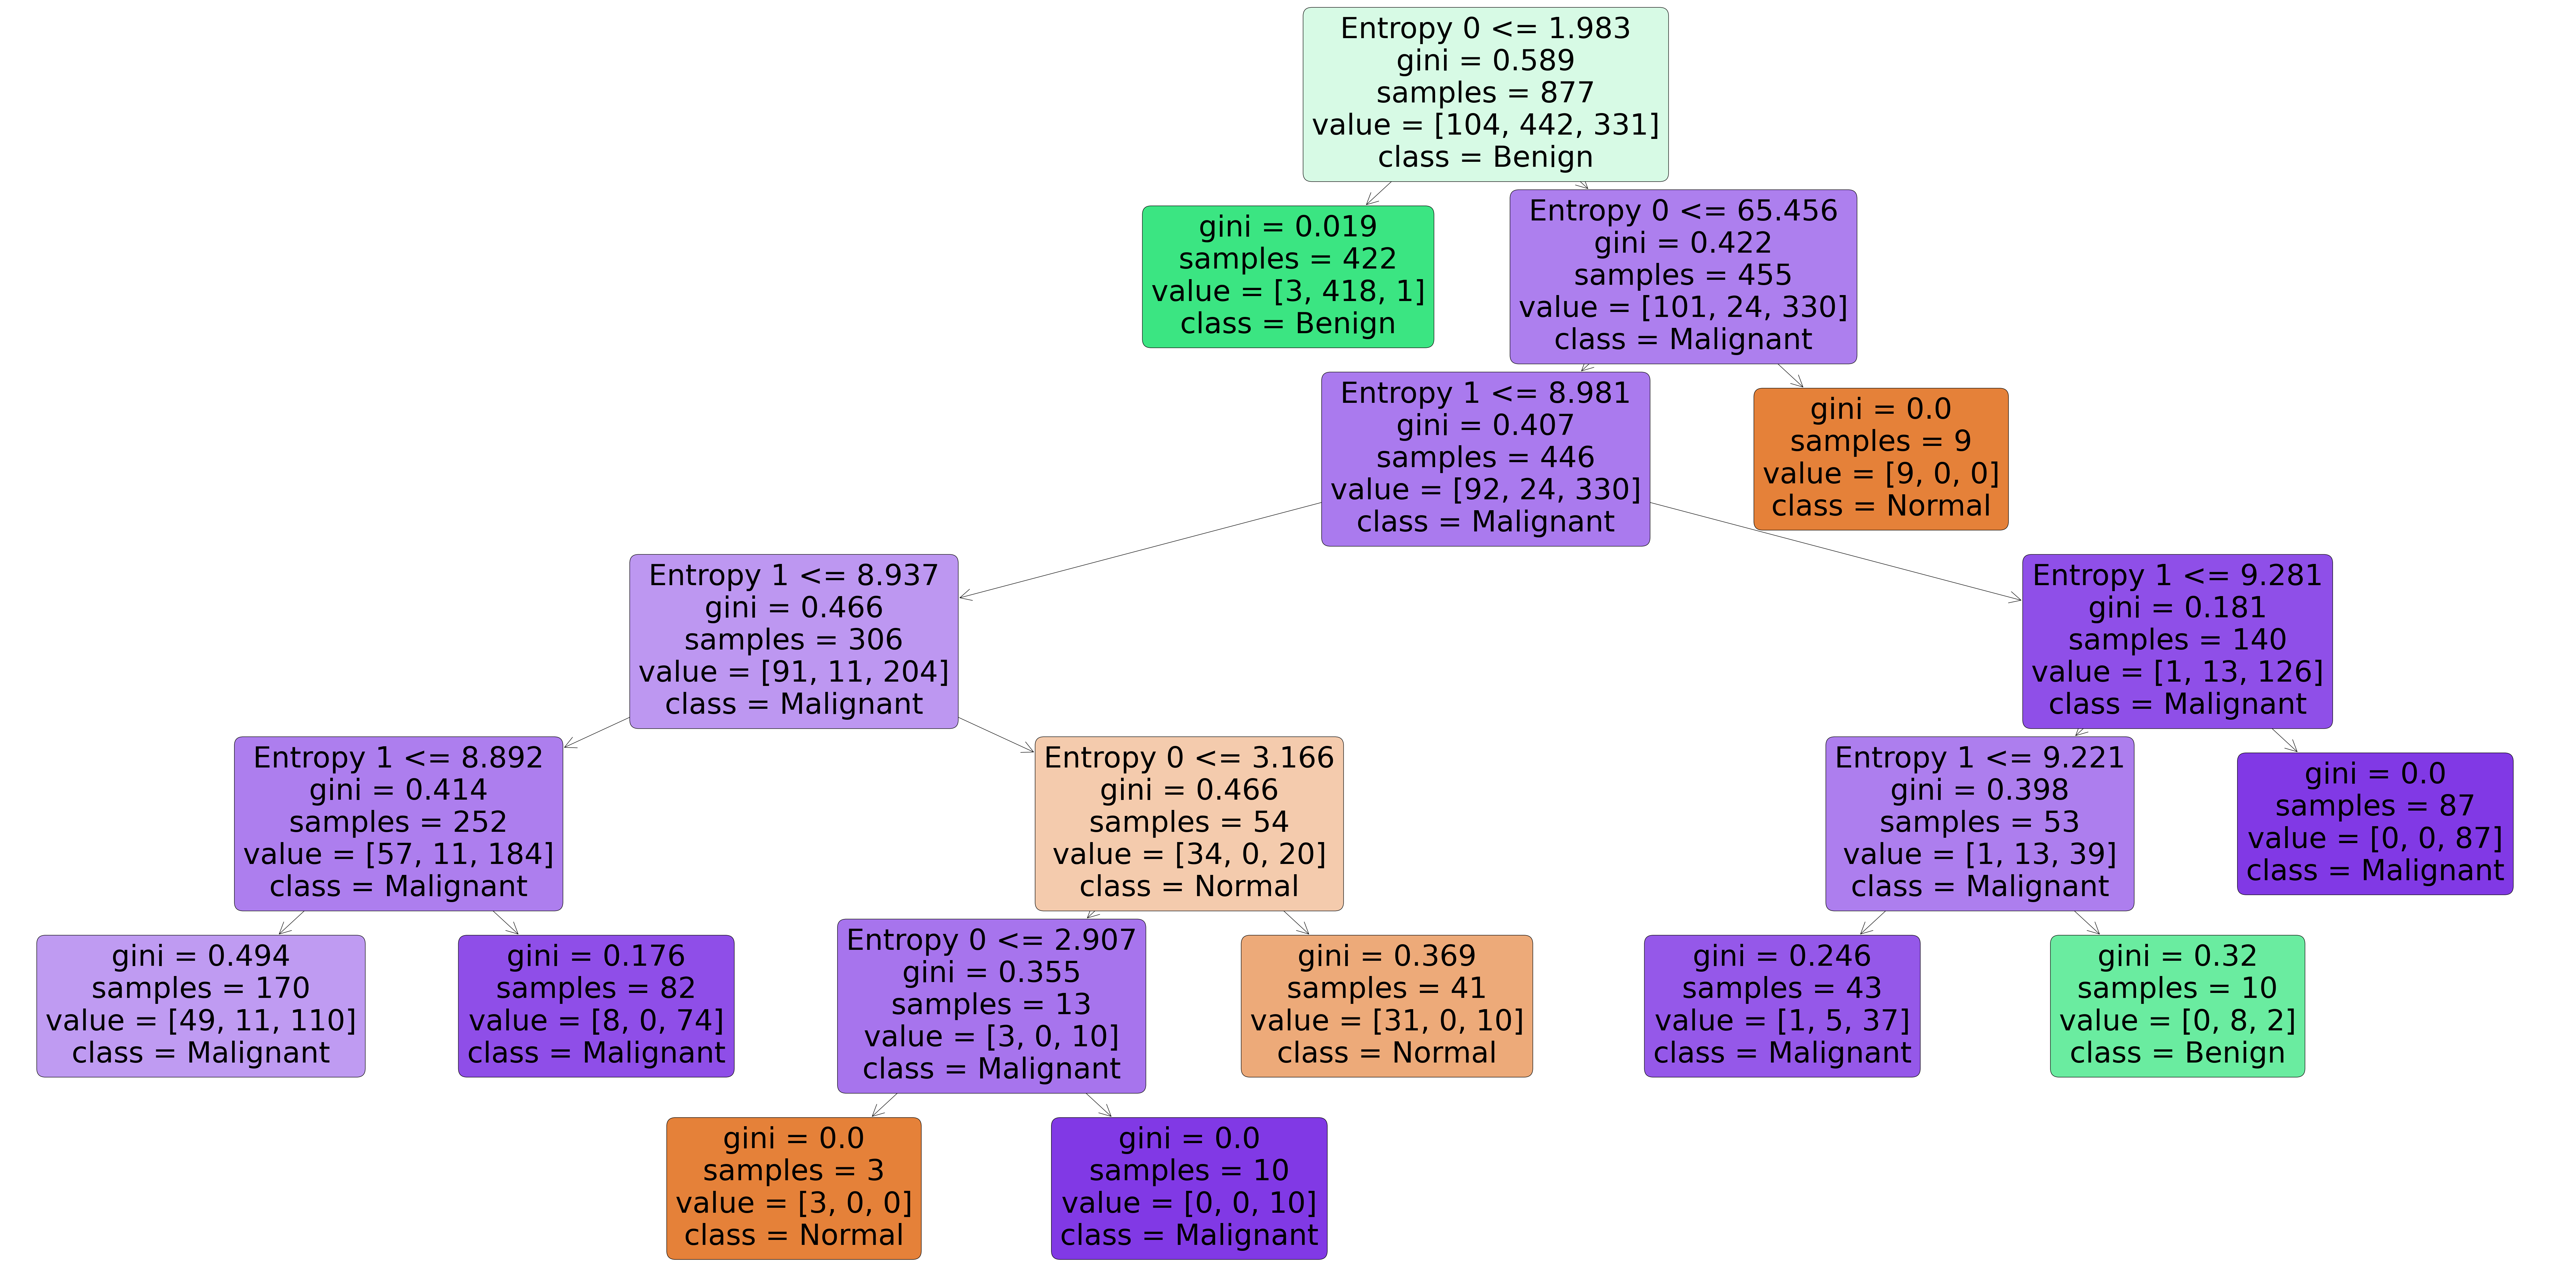

Accuracy: 0.9181818181818182
                 precision    recall  f1-score   support

   Bengin cases       0.60      0.56      0.58        16
Malignant cases       1.00      0.96      0.98       119
   Normal cases       0.87      0.93      0.90        85

       accuracy                           0.92       220
      macro avg       0.82      0.82      0.82       220
   weighted avg       0.92      0.92      0.92       220



In [27]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file containing the image features
# df = pd.read_csv('lung_image_features.csv')

# # Split the data into features (X) and labels (y)
# X = df.drop('Label', axis=1)
# y = df['Label']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree classifier
# clf = DecisionTreeClassifier(ccp_alpha=0.001)
clf = DecisionTreeClassifier(ccp_alpha=0.005)
clf.fit(X_train, y_train)

# Visualize the Decision Tree
plt.figure(figsize=(100, 50))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Normal', 'Benign', 'Malignant'], rounded=True)
plt.show()

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print the classification report
print(classification_report(y_test, y_pred))
